<a href="https://colab.research.google.com/github/dev3225/Image_Classification_CIFAR-10_dataset/blob/main/Model/Image_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Importing required libraries, layers, image datasets
from __future__ import print_function
import keras
from keras.datasets import cifar10
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from keras.layers import Conv2D, MaxPooling2D, GlobalMaxPooling2D,BatchNormalization

In [ ]:
#Setting up training parameters
batch_size = 32 
num_classes = 10
epochs = 50
data_augmentation = True

In [ ]:
# The data, shuffled and split between training and test sets
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'training samples')
print(x_test.shape[0], 'test samples')

# Convert class vectors to binary class matrices.
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

170498071/170498071 [==============================] - 4s 0us/step
x_train shape: (50000, 32, 32, 3)
50000 training samples
10000 test samples


Case 1: Relu, Softmax, RMSProp

In [ ]:
#Modeling of the convolution neural network (CNN) for training and classification
model1 = Sequential()
#Activation function can be anything preferred. Eg. tanh
model1.add(Conv2D(32, (3, 3),kernel_initializer='random_normal', input_shape=x_train.shape[1:]))
model1.add(Activation('relu'))

model1.add(Conv2D(32, (3, 3),kernel_initializer='random_normal', input_shape=x_train.shape[1:]))
mode1.add(Activation('relu'))

model1.add(Conv2D(32, (3, 3),kernel_initializer='random_normal', input_shape=x_train.shape[1:]))
model1.add(Activation('relu'))

model1.add(Conv2D(48, (3, 3),kernel_initializer='random_normal', input_shape=x_train.shape[1:]))
model1.add(Activation('relu'))

model1.add(Conv2D(48, (3, 3),kernel_initializer='random_normal', input_shape=x_train.shape[1:]))
model1.add(Activation('relu'))

model1.add(GlobalMaxPooling2D())
model1.add(Dense(500))
model1.add(Dropout(0.25))
model1.add(Dense(num_classes))
model1.add(Activation('softmax'))

In [ ]:
# Train the model using RMSprop
# Optimizer can be set to Adam with required learning rate
#opt = keras.optimizers.Adam(learning_rater=0.001)   lr is deprecated
model1.compile(loss='categorical_crossentropy',
              optimizer='RMSProp',
              metrics=['accuracy'])
model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 activation (Activation)     (None, 30, 30, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 28, 28, 32)        9248      
                                                                 
 activation_1 (Activation)   (None, 28, 28, 32)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 26, 26, 32)        9248      
                                                                 
 activation_2 (Activation)   (None, 26, 26, 32)        0         
                                                                 
 conv2d_3 (Conv2D)           (None, 24, 24, 48)        1

In [ ]:
m1=model1.fit(x_train, y_train,
              batch_size=batch_size,
              epochs=epochs,
              validation_data=(x_test, y_test),
              shuffle=True)

Epoch 1/50
1563/1563 [==============================] - 24s 8ms/step - loss: 1.8672 - accuracy: 0.2919 - val_loss: 1.9266 - val_accuracy: 0.2983
Epoch 2/50
1563/1563 [==============================] - 11s 7ms/step - loss: 1.5006 - accuracy: 0.4481 - val_loss: 1.4150 - val_accuracy: 0.4798
Epoch 3/50
1563/1563 [==============================] - 11s 7ms/step - loss: 1.3454 - accuracy: 0.5117 - val_loss: 1.2554 - val_accuracy: 0.5484
Epoch 4/50
1563/1563 [==============================] - 14s 9ms/step - loss: 1.2539 - accuracy: 0.5508 - val_loss: 1.2287 - val_accuracy: 0.5597
Epoch 5/50
1563/1563 [==============================] - 11s 7ms/step - loss: 1.1876 - accuracy: 0.5793 - val_loss: 1.1879 - val_accuracy: 0.5730
Epoch 6/50
1563/1563 [==============================] - 11s 7ms/step - loss: 1.1387 - accuracy: 0.5952 - val_loss: 1.2252 - val_accuracy: 0.5683
Epoch 7/50
1563/1563 [==============================] - 13s 9ms/step - loss: 1.0991 - accuracy: 0.6109 - val_loss: 1.1671 - val_ac

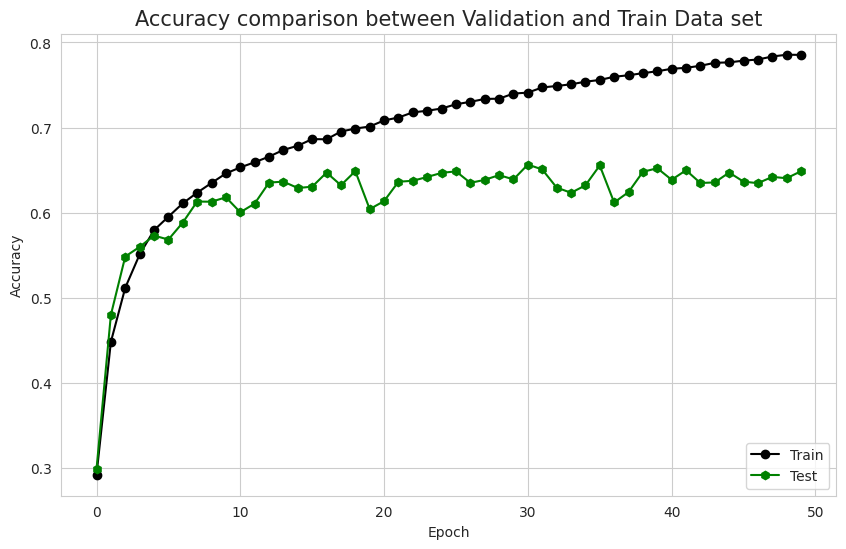

In [ ]:
#Importing libraries required for visualization(plots)
import matplotlib.pyplot as plt
import seaborn as sb
#Visualization of Accuracy for training and test sets
plt.figure(figsize=(10,6))
sb.set_style("whitegrid")
plt.plot(m1.history['accuracy'],color="black",marker='o')
plt.plot(m1.history['val_accuracy'],color='green',marker='h')
plt.title('Accuracy comparison between Validation and Train Data set',fontsize=15)
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='lower right')
plt.show()

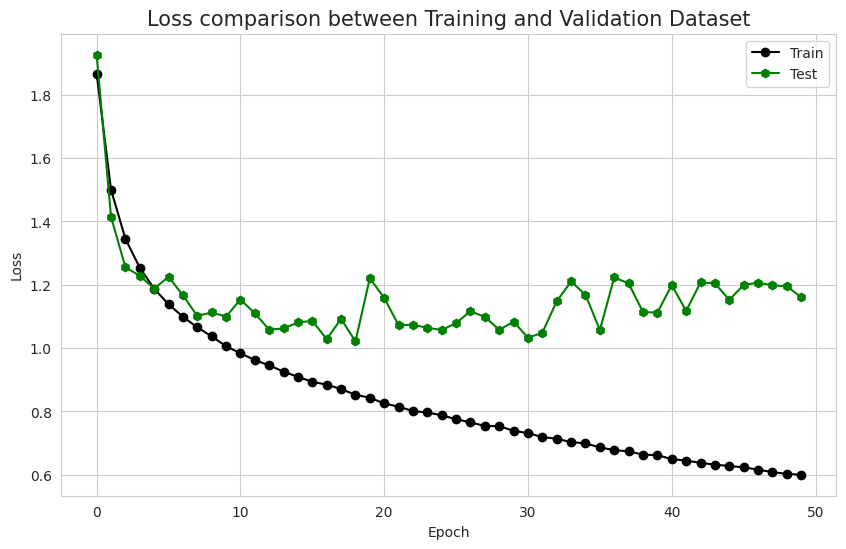

In [ ]:
#Visualization of Loss comparsison for training and test sets
plt.figure(figsize=(10,6))
sb.set_style("whitegrid")
plt.plot(m1.history['loss'],color="black",marker='o')
plt.plot(m1.history['val_loss'],color='green',marker='h')
plt.title('Loss comparison between Training and Validation Dataset',fontsize=15)
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='best')
plt.show()

Case 2: tanh, softmax, Adam, No batch normalization

In [ ]:
#Modeling of the convolution neural network (CNN) for training and classification
model2 = Sequential()

model2.add(Conv2D(32, (3, 3),kernel_initializer='random_normal', input_shape=x_train.shape[1:]))
model2.add(Activation('tanh'))

model2.add(Conv2D(32, (3, 3),kernel_initializer='random_normal', input_shape=x_train.shape[1:]))
model2.add(Activation('tanh'))

model2.add(Conv2D(32, (3, 3),kernel_initializer='random_normal', input_shape=x_train.shape[1:]))
model2.add(Activation('tanh'))

model2.add(Conv2D(48, (3, 3),kernel_initializer='random_normal', input_shape=x_train.shape[1:]))
model2.add(Activation('tanh'))

model2.add(Conv2D(48, (3, 3),kernel_initializer='random_normal', input_shape=x_train.shape[1:]))
model2.add(Activation('tanh'))

model2.add(GlobalMaxPooling2D())
model2.add(Dense(500))
model2.add(Dropout(0.25))
model2.add(Dense(num_classes))
model2.add(Activation('softmax'))

In [ ]:
# Train the model using Adam
# Optimizer can be set to Adam with required learning rate
opt = keras.optimizers.Adam(learning_rate=0.001)
model2.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])
model2.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 activation (Activation)     (None, 30, 30, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 28, 28, 32)        9248      
                                                                 
 activation_1 (Activation)   (None, 28, 28, 32)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 26, 26, 32)        9248      
                                                                 
 activation_2 (Activation)   (None, 26, 26, 32)        0         
                                                                 
 conv2d_3 (Conv2D)           (None, 24, 24, 48)        1

In [ ]:
m2=model2.fit(x_train, y_train,
              batch_size=batch_size,
              epochs=epochs,
              validation_data=(x_test, y_test),
              shuffle=True)

Epoch 1/50
1563/1563 [==============================] - 21s 7ms/step - loss: 1.7364 - accuracy: 0.3531 - val_loss: 1.5170 - val_accuracy: 0.4453
Epoch 2/50
1563/1563 [==============================] - 11s 7ms/step - loss: 1.4636 - accuracy: 0.4710 - val_loss: 1.3889 - val_accuracy: 0.4962
Epoch 3/50
1563/1563 [==============================] - 10s 7ms/step - loss: 1.3751 - accuracy: 0.5073 - val_loss: 1.3176 - val_accuracy: 0.5311
Epoch 4/50
1563/1563 [==============================] - 12s 7ms/step - loss: 1.3090 - accuracy: 0.5343 - val_loss: 1.3130 - val_accuracy: 0.5315
Epoch 5/50
1563/1563 [==============================] - 11s 7ms/step - loss: 1.2682 - accuracy: 0.5477 - val_loss: 1.2403 - val_accuracy: 0.5583
Epoch 6/50
1563/1563 [==============================] - 12s 7ms/step - loss: 1.2229 - accuracy: 0.5654 - val_loss: 1.2833 - val_accuracy: 0.5435
Epoch 7/50
1563/1563 [==============================] - 11s 7ms/step - loss: 1.1924 - accuracy: 0.5738 - val_loss: 1.2342 - val_ac

In [ ]:
#Importing libraries required for visualization(plots)
import matplotlib.pyplot as plt
import seaborn as sb

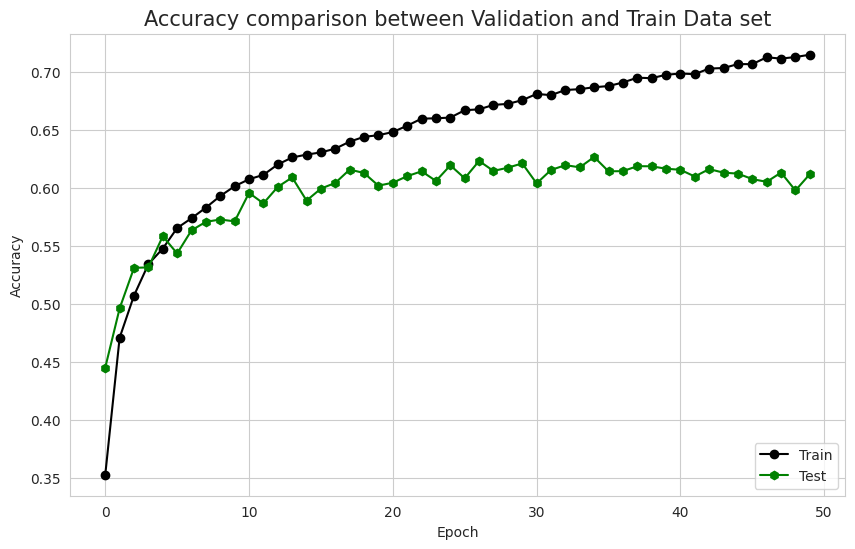

In [ ]:
#Visualization of Accuracy for training and test sets
plt.figure(figsize=(10,6))
sb.set_style("whitegrid")
plt.plot(m2.history['accuracy'],color="black",marker='o')
plt.plot(m2.history['val_accuracy'],color='green',marker='h')
plt.title('Accuracy comparison between Validation and Train Data set',fontsize=15)
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='lower right')
plt.show()

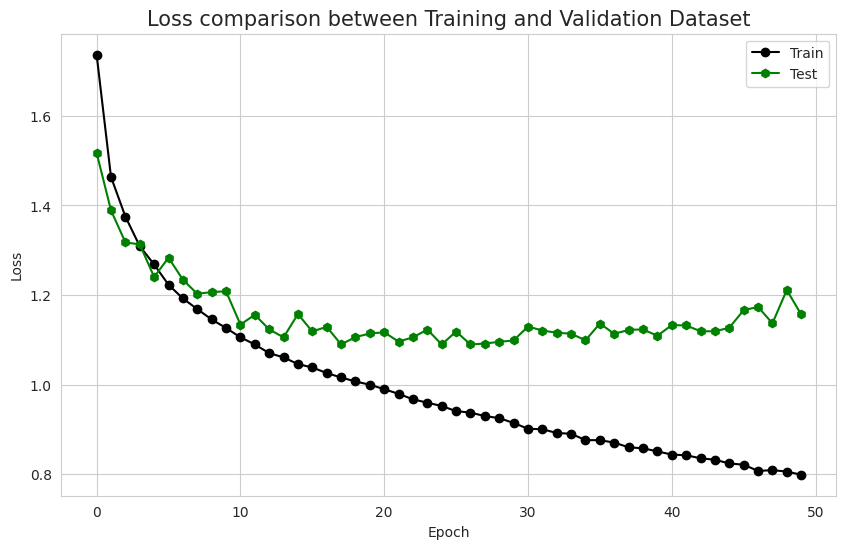

In [ ]:
#Visualization of Loss comparsison for training and test sets
plt.figure(figsize=(10,6))
sb.set_style("whitegrid")
plt.plot(m2.history['loss'],color="black",marker='o')
plt.plot(m2.history['val_loss'],color='green',marker='h')
plt.title('Loss comparison between Training and Validation Dataset',fontsize=15)
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='best')
plt.show()

Case 3: relu, softmax, adamax, batch normalization

In [ ]:
model3 = Sequential()

model3.add(Conv2D(32, (3, 3),kernel_initializer='random_uniform',
                 input_shape=x_train.shape[1:]))
model3.add(Activation('relu'))
model3.add(BatchNormalization())
model3.add(Conv2D(32, (3, 3),kernel_initializer='random_uniform',
                 input_shape=x_train.shape[1:]))
model3.add(Activation('relu'))
model3.add(BatchNormalization())
model3.add(Conv2D(32, (3, 3),kernel_initializer='random_uniform',
                 input_shape=x_train.shape[1:]))
model3.add(Activation('relu'))
model3.add(BatchNormalization())
model3.add(Conv2D(48, (3, 3),kernel_initializer='random_uniform',
                 input_shape=x_train.shape[1:]))
model3.add(Activation('relu'))
model3.add(BatchNormalization())
model3.add(Conv2D(48, (3, 3),kernel_initializer='random_uniform',
                 input_shape=x_train.shape[1:]))
model3.add(Activation('relu'))
model3.add(BatchNormalization())
model3.add(Conv2D(48, (3, 3),kernel_initializer='random_uniform',
                 input_shape=x_train.shape[1:]))
model3.add(Activation('relu'))
model3.add(BatchNormalization())
model3.add(Conv2D(64, (3, 3),kernel_initializer='random_uniform',
                 input_shape=x_train.shape[1:]))
model3.add(Activation('relu'))
model3.add(BatchNormalization())
model3.add(Conv2D(128, (3, 3),kernel_initializer='random_uniform',
                 input_shape=x_train.shape[1:]))
model3.add(Activation('relu'))
model3.add(BatchNormalization())
model3.add(GlobalMaxPooling2D())
model3.add(Dropout(0.25))
model3.add(Dense(num_classes))
model3.add(Activation('softmax'))
model3.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 activation (Activation)     (None, 30, 30, 32)        0         
                                                                 
 batch_normalization (BatchN  (None, 30, 30, 32)       128       
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 28, 28, 32)        9248      
                                                                 
 activation_1 (Activation)   (None, 28, 28, 32)        0         
                                                                 
 batch_normalization_1 (Batc  (None, 28, 28, 32)       128       
 hNormalization)                                        

In [ ]:
#Optmizer used is Adamax with learning rate = 0.001
opt = keras.optimizers.Adamax(learning_rate=0.001)
model3.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

In [ ]:
m3=model3.fit(x_train, y_train,
              batch_size=500,
              epochs=epochs,
              validation_data=(x_test, y_test),
              shuffle=True)

Epoch 1/50
100/100 [==============================] - 22s 101ms/step - loss: 2.6142 - accuracy: 0.2362 - val_loss: 2.3123 - val_accuracy: 0.1000
Epoch 2/50
100/100 [==============================] - 10s 99ms/step - loss: 2.0567 - accuracy: 0.3052 - val_loss: 2.5025 - val_accuracy: 0.1000
Epoch 3/50
100/100 [==============================] - 10s 98ms/step - loss: 1.9049 - accuracy: 0.3498 - val_loss: 2.8366 - val_accuracy: 0.1002
Epoch 4/50
100/100 [==============================] - 10s 98ms/step - loss: 1.7749 - accuracy: 0.3926 - val_loss: 2.8971 - val_accuracy: 0.1170
Epoch 5/50
100/100 [==============================] - 10s 99ms/step - loss: 1.6803 - accuracy: 0.4287 - val_loss: 2.4810 - val_accuracy: 0.1983
Epoch 6/50
100/100 [==============================] - 10s 100ms/step - loss: 1.5909 - accuracy: 0.4561 - val_loss: 1.7972 - val_accuracy: 0.3403
Epoch 7/50
100/100 [==============================] - 10s 101ms/step - loss: 1.5030 - accuracy: 0.4847 - val_loss: 1.5359 - val_accura

In [8]:
#Importing libraries required for visualization(plots)
import matplotlib.pyplot as plt
import seaborn as sb

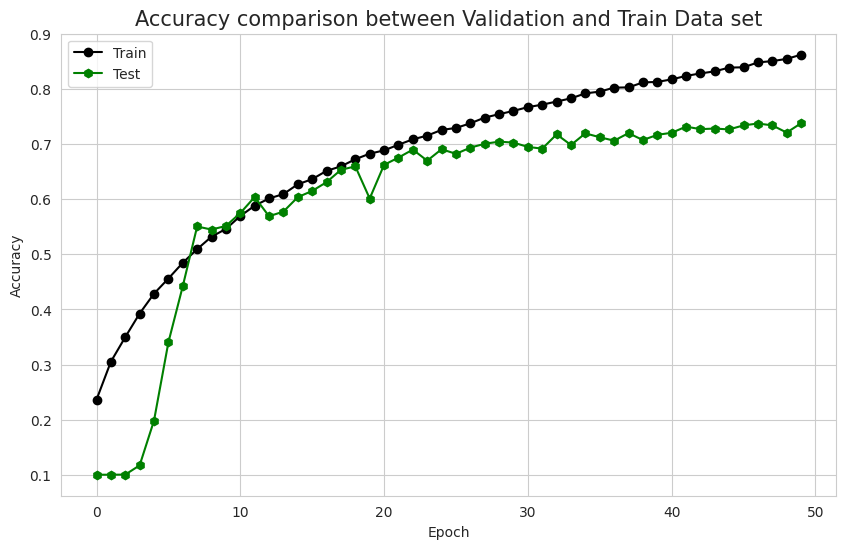

In [10]:
plt.figure(figsize=(10,6))
sb.set_style("whitegrid")
plt.plot(m3.history['accuracy'],color="black",marker='o')
plt.plot(m3.history['val_accuracy'],color='green',marker='h')
plt.title('Accuracy comparison between Validation and Train Data set',fontsize=15)
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='best')
plt.show()

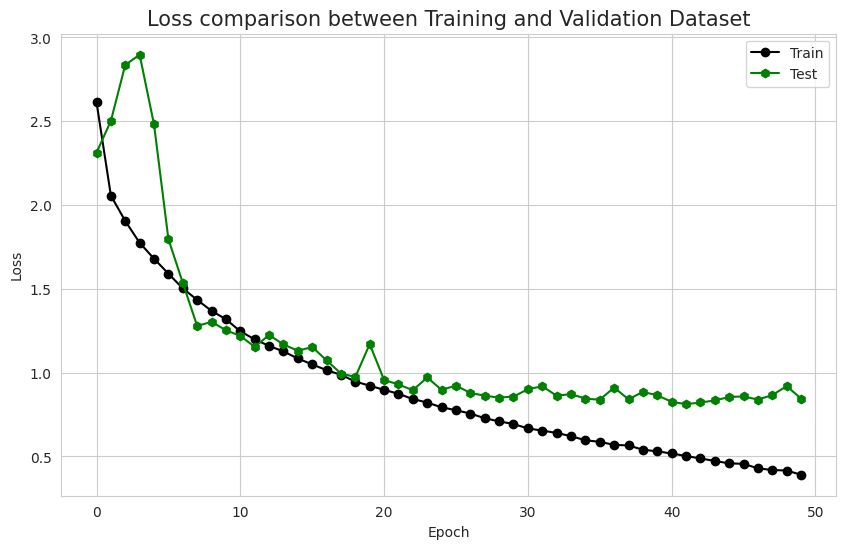

In [12]:
#Visualization of Loss comparsison for training and test sets
plt.figure(figsize=(10,6))
sb.set_style("whitegrid")
plt.plot(m3.history['loss'],color="black",marker='o')
plt.plot(m3.history['val_loss'],color='green',marker='h')
plt.title('Loss comparison between Training and Validation Dataset',fontsize=15)
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='best')
plt.show()